<a href="https://colab.research.google.com/github/nixonleonard/UTS-UAS-ML/blob/main/UAS_2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist 

In [ ]:
np.random.seed(42)

#Importing Dataset

In [ ]:
data = pd.read_csv('DNA.csv')

Dibawah ini saya hanya ingin memastikan tidak ada adta yang memiliki missing value

In [ ]:
data.isnull().sum()

num_of_atoms          0
num_of_heavy_atoms    0
dtype: int64

#K-Means Model with euclidean distance

In [ ]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

Pada model dibawah ini, sata pertama tama akan menentukan cluster / k. Saya menentukan cluster / k tersebut bedasarkan dataset yang ada, disini saya berasumsi bahwa cluster tersebut ada 2 kemungkinan cluster, misalkan untuk memisahkan DNA laki laki dan DNA perempuan.

In [ ]:
class kMeans:
    def __init__(self, k=2, maxIteration=100, stepPlot=False):
        #penentuan nilai k (dipanggil dibawah)
        #serta menentukan maksimal iterasi, iterasi dilakukan hingga centroid tidak berpindah pindah lagi
        self.k = k
        self.maxIteration = maxIteration
        self.stepPlot = stepPlot
        self.clusters = [[] for _ in range(self.k)]
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        #penentuan centroid pertama secara acak
        randomSampleIndex = np.random.choice(self.n_samples, self.k, replace=False)
        self.centroids = [self.X[idx] for idx in randomSampleIndex]

        for _ in range(self.maxIteration):
            self.clusters = self.Clustering(self.centroids)
            if self.stepPlot:
                self.plot()
            oldCentroids = self.centroids
            self.centroids = self.GetCentorid(self.clusters)
            if self.BoolConverged(oldCentroids, self.centroids):
                break
            if self.stepPlot:
                self.plot()
        return self.GetLabelClustering(self.clusters)

    def GetLabelClustering(self, clusters):
        labels = np.empty(self.n_samples)
        for idxCluster, cluster in enumerate(clusters):
            for idxSample in cluster:
                labels[idxSample] = idxCluster
        return labels

    def Clustering(self, centroids):
        #Mencocokan titikdengan centroid terdekat (Expectation)
        clusters = [[] for _ in range(self.k)]
        for index, sample in enumerate(self.X):
            idxCentroid = self.NearCentroid(sample, centroids)
            clusters[idxCentroid].append(index)
        return clusters

    def NearCentroid(self, sample, centroids):
        distances = [euclidean(sample, point) for point in centroids]
        nearIdx = np.argmin(distances)
        return nearIdx

    def GetCentorid(self, clusters):
        #Menghitung centroid baru atau mean dari tiap cluster (Maximization)
        centroids = np.zeros((self.k, self.n_features))
        for idxCluster, cluster in enumerate(clusters):
            meanCluster = np.mean(self.X[cluster], axis=0)
            centroids[idxCluster] = meanCluster
        return centroids

    def BoolConverged(self, oldCentroids, centroids):
        distances = [euclidean(oldCentroids[i], centroids[i]) for i in range(self.k)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(14, 10))

        for i, idx in enumerate(self.clusters):
            point = self.X[idx].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="+", color="black", linewidth=3, s = 90)

        plt.show()


Selanjutnya sebelum melakukan menjalankan model tersebut, kita memanggil X untuk mengubah dataframe dari dataset diatas menjadi array.
Seperti yang dijelaskan diatas tadi, cluster akan saya asumsikan sebagai 2

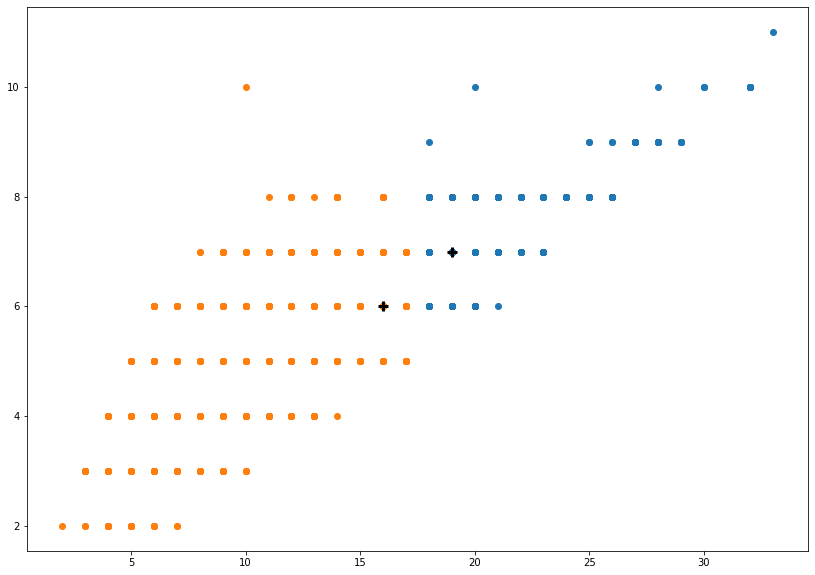

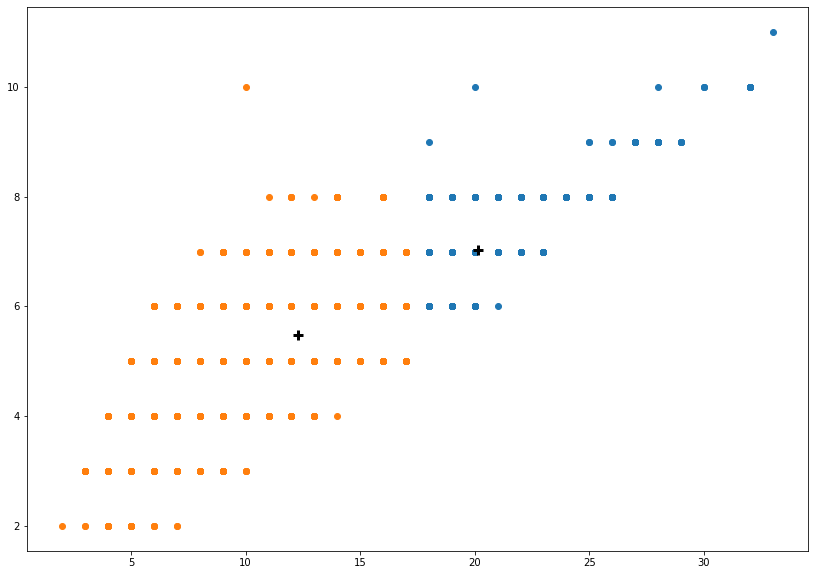

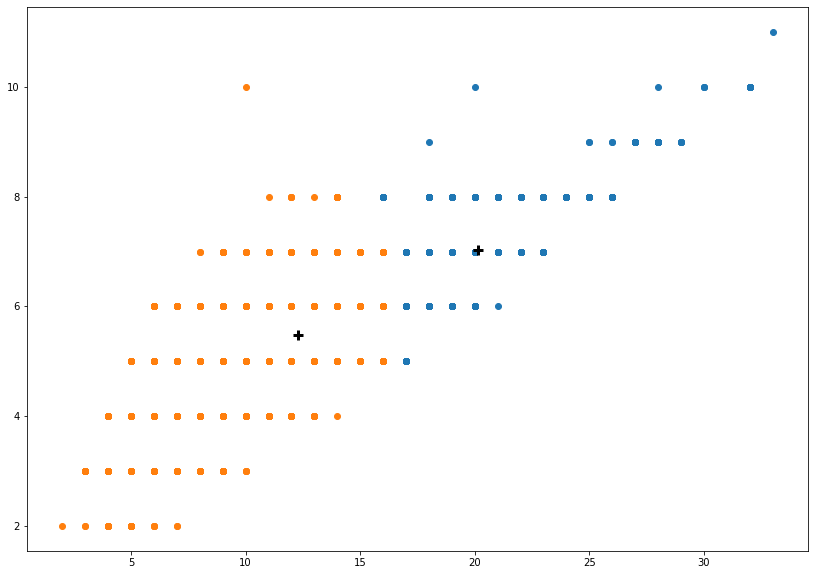

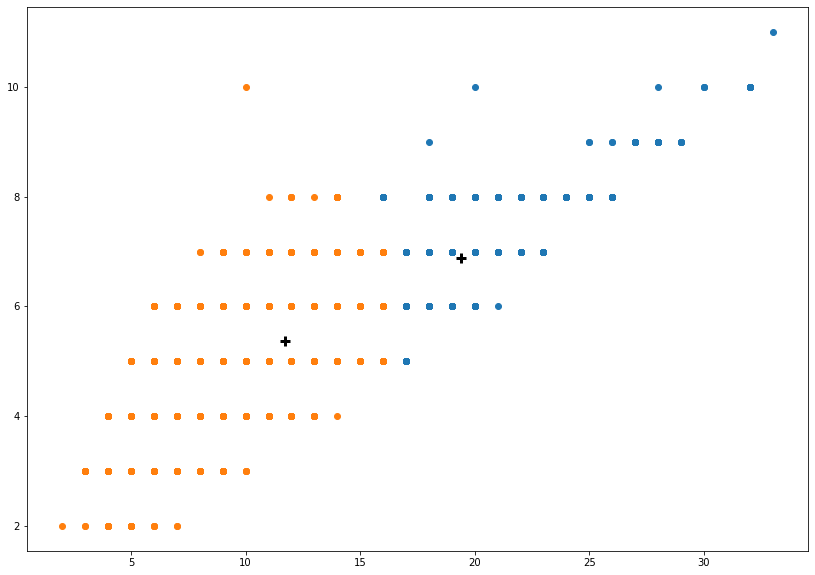

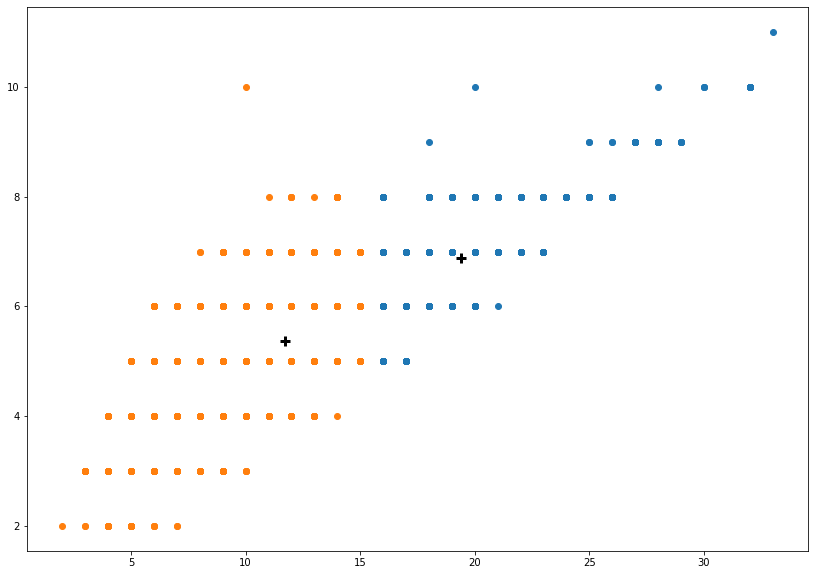

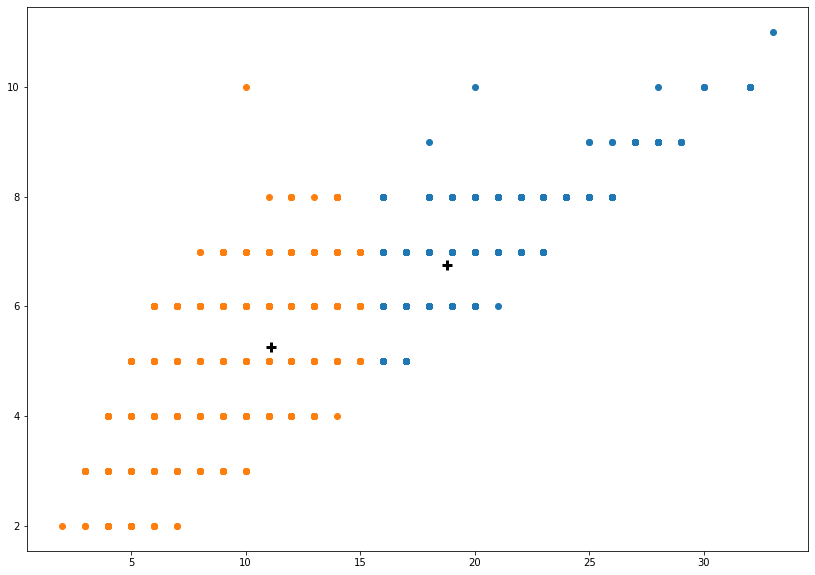

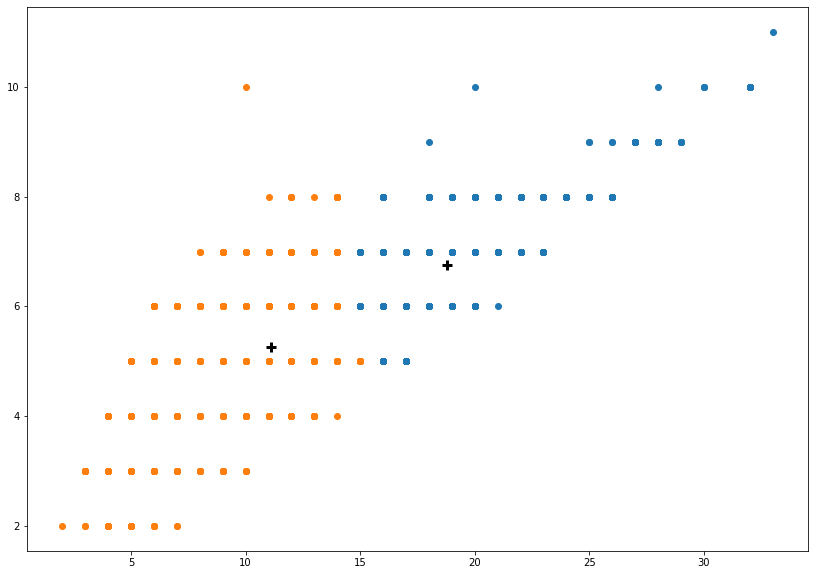

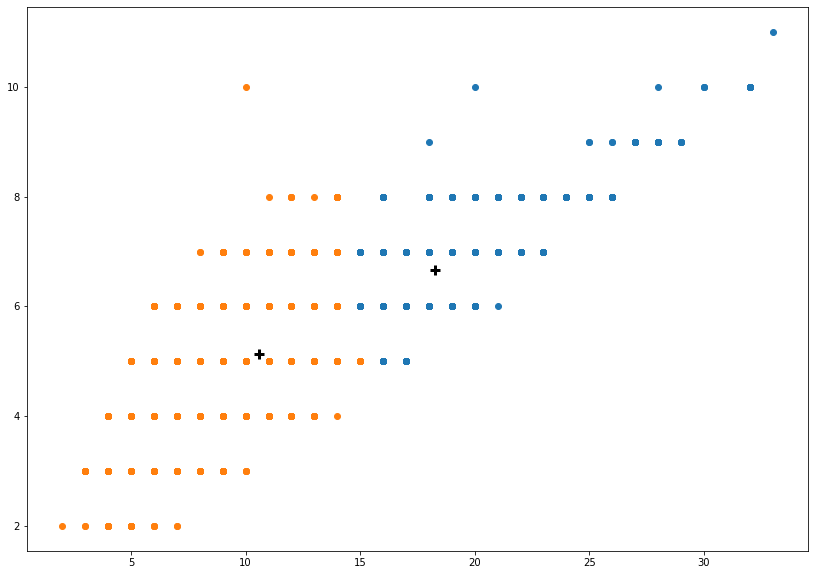

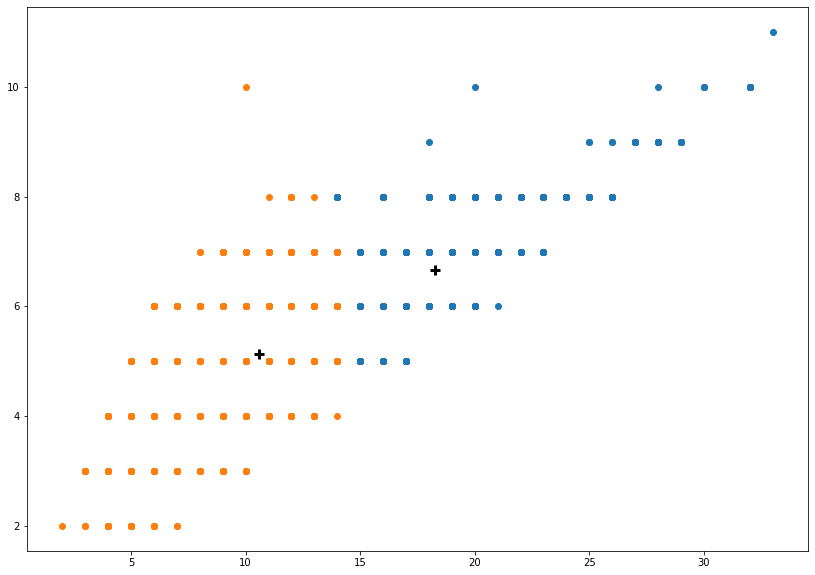

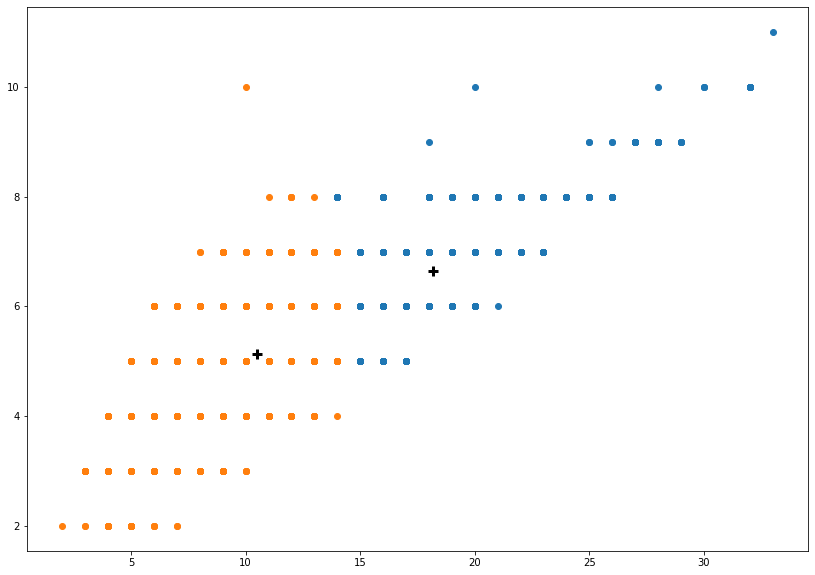

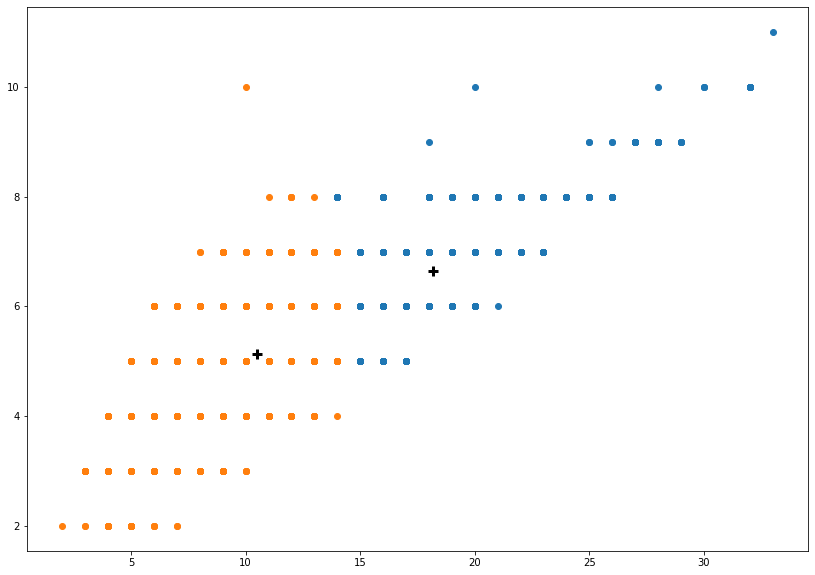

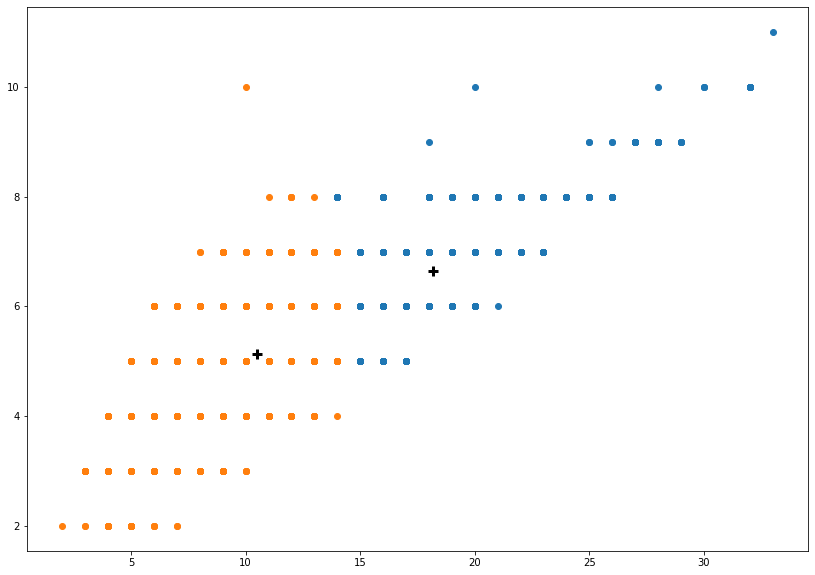

In [ ]:
X = data.values
clusters = 2

k = kMeans(k=clusters, maxIteration=100, stepPlot=True)
y_pred = k.predict(X)

k.plot()

Bisa dilihat dari hasil diatas, bahwa program sudah berjalan sesuai soal. Iterasi terlah dilakukan beberapakali dari centroid random awal. Terakhir centroid sudah tidak bergerak lagi dan iterasi diberhentikan.